In [11]:
import numpy as np
import scipy.interpolate 

def generate(N, MinV, MaxV, numOctaves=4, persistance=2):
    ns=numOctaves
    p=persistance
    total = np.zeros((ns, N))
    for s in range(ns):
        frequency = pow(2, ns-s)
        amplitude = pow(p,s)
        X = np.arange(1, (N+200), frequency)
        spline = scipy.interpolate.splrep(X, np.random.rand(len(X)))
        nv = scipy.interpolate.splev(range(N+200), spline) * amplitude
        nv[nv<0] = 0
        total[s,:] = nv[100:-100]
    stotal = np.sum(total,0)
    stotal = stotal-np.min(stotal)
    vector = np.divide(stotal,max(stotal)) * (MaxV-MinV) + MinV
    return vector


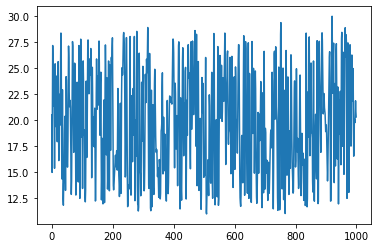

In [26]:
from matplotlib import pyplot as plt

numTimepoints = 1000
result = generate(numTimepoints,11,30, numOctaves=5, persistance=10)
plt.plot(range(numTimepoints), result)

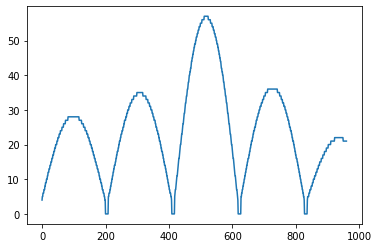

In [27]:
faFilepath = "largescale/FA_LS"
FAs = np.loadtxt(faFilepath)
plt.plot(range(len(FAs)), FAs)

In [63]:
class Perlin:
    def __init__(self, seed=-1): # Initialize a PRNG (Linear Congruential Generator)
        self.M = 4294967296
        self.A = 1664525         
        self.C = 1
        if(seed == -1):
            self.Z = np.floor(np.random.random() * self.M)
        else:
            self.Z = seed
    
    def rand(self):
        self.Z = (self.A*self.Z+self.C) % self.M
        return self.Z/self.M
    
    def interpolate(self,pa,pb,px): # cosine interpolation
        ft =  px * np.pi
        f = (1-np.cos(ft))*0.5
        return pa * (1-f) + pb*f
    
    def generate(self, numValues, amplitude, wavelength,firstValue=-1):
        if firstValue ==-1:
            a = self.rand() * amplitude
            b = self.rand() * amplitude
        else:
            a = firstValue
            b = firstValue

        currentValue = 0
        values=[]
        for i in range(numValues):
            if i % wavelength == 0:
                a = b
                b = self.rand() * amplitude
                currentValue = a
            else:
                currentValue = self.interpolate(a, b, (i % wavelength) / wavelength)
            values.append(currentValue)
        return values



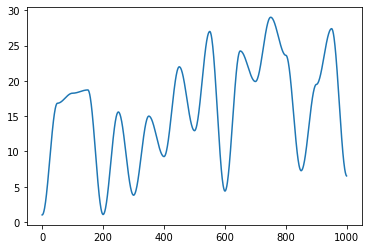

In [64]:
from matplotlib import pyplot as plt

numTimepoints = 1000
p = Perlin()
result = p.generate(numTimepoints, 30, 50, firstValue=1)
plt.plot(range(numTimepoints), result)